**Exercise 01**

- determine the extreme values in data (column)
    - by using IQR method (Inter quartile method)

In [1]:
import numpy as np

In [12]:
np.random.seed(11)
# generate data
data = np.random.randint(low=10, high=999, size=100)

In [13]:
data

array([931, 713,  90, 101, 347, 961, 279, 342, 683, 593, 860, 802, 631,
       614, 698, 775, 426, 823, 246, 647, 910, 556, 150, 907, 852,  47,
       511, 241, 478,  91, 101, 418, 514, 667, 589, 336, 693, 380, 252,
       714, 135,  89, 618,  33, 933, 848,  99, 373, 148, 451,  37, 822,
       255, 152, 273, 449, 345, 970, 690, 506, 293, 258, 745, 143, 703,
       849, 700, 237, 709,  11, 141, 914, 737, 475, 590, 338, 124, 682,
       856, 285, 931, 895, 100, 944, 453, 283,  53,  28, 519,  58, 148,
       313, 120, 170, 438,  50, 274, 462, 939, 395])

In [14]:
np.min(data), np.max(data)

(11, 970)

In [15]:
# Q1 cutoff
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)

In [16]:
# difference of Q3 - Q1 = IQR (inter quartile range)
iqr = q3 - q1
iqr

484.25

`Extreme value`
- on the lower side
    - q1 - (iqr) * 1.5
- higher side
    - q3 + (iqr) * 1.5

In [17]:
low_cut_off  = q1 - (iqr * 1.5)
high_cut_off = q3 + (iqr * 1.5)

low_cut_off, high_cut_off

(-506.125, 1430.875)

**Example: 02**

A survey was given to a random sample of 20 sophomore college students. They were asked, “how many textbooks do you own?” Their responses, were: 0, 0, 2, 5, 8, 8, 8, 9, 9, 10, 10, 10, 11, 12, 12, 12, 14, 15, 20, and 25.

In [19]:
data = np.array([0, 0, 2, 5, 8, 8, 8, 9, 9, 10, 10, 10, 11, 12, 12, 12, 14, 15, 20, 25])

In [20]:
data

array([ 0,  0,  2,  5,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 12, 14,
       15, 20, 25])

In [21]:
np.min(data), np.max(data)

(0, 25)

In [22]:
# Q1 cutoff
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)

# difference of Q3 - Q1 = IQR (inter quartile range)
iqr = q3 - q1

low_cut_off  = q1 - (iqr * 1.5)
high_cut_off = q3 + (iqr * 1.5)

low_cut_off, high_cut_off

(2.0, 18.0)

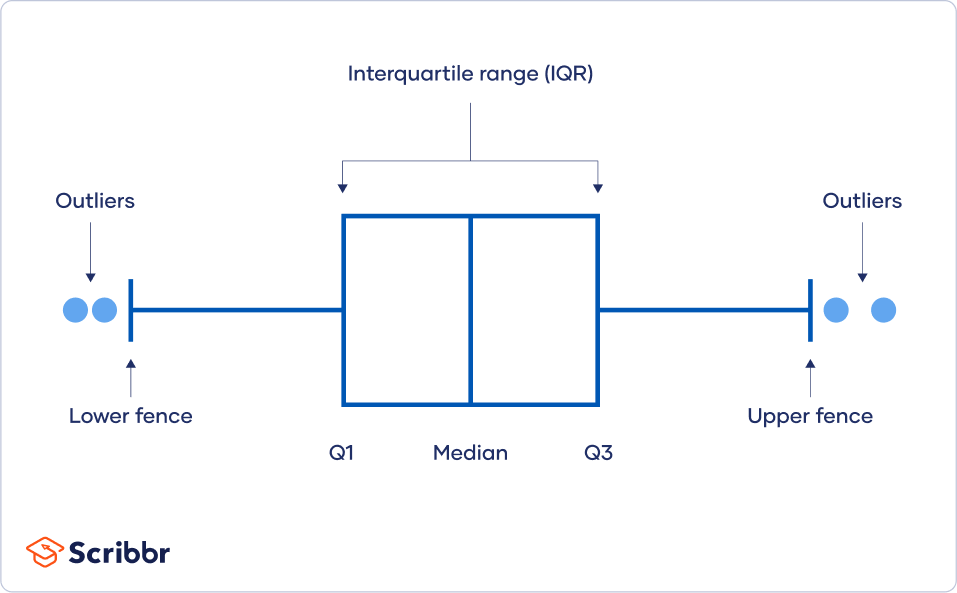

In [32]:
def determine_high_low_cutoff(data, iqr_multipler=1.5):
    
    # Q1 cutoff
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    # difference of Q3 - Q1 = IQR (inter quartile range)
    iqr = q3 - q1

    low_cut_off  = q1 - (iqr * iqr_multipler)
    high_cut_off = q3 + (iqr * iqr_multipler)

    return low_cut_off, high_cut_off

In [25]:
import pandas as pd

In [26]:
boston_data = '/data/AI-DATASETS/01-MISC/boston.csv'

In [27]:
df = pd.read_csv(boston_data)

In [28]:
df.shape


(506, 14)

In [29]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [30]:
df.sample(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
250,0.14030,22.0,5.86,0,0.4310,6.487,13.0,7.3967,7,330,19.1,396.28,5.90,24.4
203,0.03510,95.0,2.68,0,0.4161,7.853,33.2,5.1180,4,224,14.7,392.78,3.81,48.5
504,0.10959,0.0,11.93,0,0.5730,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
274,0.05644,40.0,6.41,1,0.4470,6.758,32.9,4.0776,4,254,17.6,396.90,3.53,32.4
110,0.10793,0.0,8.56,0,0.5200,6.195,54.4,2.7778,5,384,20.9,393.49,13.00,21.7


In [34]:
determine_high_low_cutoff(df['crim'].values)

(-5.31051125, 9.06963875)

In [35]:
df['crim'].describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: crim, dtype: float64

In [37]:
# which values are outliers
col_values = df['crim'].values
col_values[col_values > 9.06963875]

array([13.5222 ,  9.2323 , 11.1081 , 18.4982 , 19.6091 , 15.288  ,
        9.82349, 23.6482 , 17.8667 , 88.9762 , 15.8744 ,  9.18702,
       20.0849 , 16.8118 , 24.3938 , 22.5971 , 14.3337 , 11.5779 ,
       13.3598 , 38.3518 ,  9.91655, 25.0461 , 14.2362 ,  9.59571,
       24.8017 , 41.5292 , 67.9208 , 20.7162 , 11.9511 , 14.4383 ,
       51.1358 , 14.0507 , 18.811  , 28.6558 , 45.7461 , 18.0846 ,
       10.8342 , 25.9406 , 73.5341 , 11.8123 , 11.0874 , 12.0482 ,
       15.8603 , 12.2472 , 37.6619 ,  9.33889, 10.0623 , 13.9134 ,
       11.1604 , 14.4208 , 15.1772 , 13.6781 ,  9.39063, 22.0511 ,
        9.72418,  9.96654, 12.8023 , 10.6718 ,  9.92485,  9.32909,
        9.51363, 15.5757 , 13.0751 , 15.0234 , 10.233  , 14.3337 ])